#Field Center Measurement and Comparison.

##My data
I have measured B(z) with z = 0 denoting the bottom of the Oxford Instruments Cryostat. It was fitted into the magnet with the plastic tube, but without any clamp, so that the distance between magnet top flange and cryostat top flange was 50.8 cm.  The depth of the Oxford cryostat was measured to be 141.2 cm (1417 by drawing).

Length of cryostat by drawing 1417
Field center relative to bottom of sample space in cryostat: 8.3cm

Distance of Magnet top flange to field center is 1417 - 508 - 83 = 826.

The Bruker manual for the magnet gives 828 mm for the distance from the top flange to the center, and 378 mm for the distance magnetic center to bottom flange.


##Bruker data
The Bruker data was taken at slightly higher field, but the two datasets should scale accordingly.

##Conclusion
The two datasets suggest that with this configuration, the field center is 8.3 cm above the bottom of the cryostat. 

The Oxford cryostat length top flange to bottom is 141.2 cm, whereas my insert top flange to cavity is only 136cm. There is also a 4mm O-Ring, so the sample is at h = 141.2cm - 136cm + 0.4cm = 5.6cm above the bottom. It hence needs lifting up by another 2.7cm.

Distance field center to top flange of magnet:  826


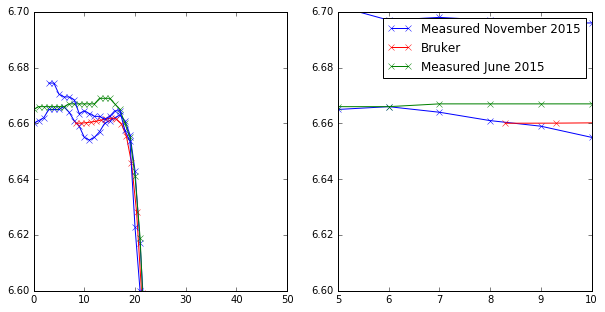

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#my data
z = np.arange(0, 31)
field = [6.660, 6.661, 6.662, 6.665, 6.665, 6.665, 6.666, 6.664, 6.661, 6.659, 6.655, 6.654, 6.655, 6.657, 6.660, 6.661, 6.662, 6.663, 6.661, 6.656, 6.643, 6.617, 6.585, 6.528, 6.457, 6.326, 6.165, 5.995, 5.753, 5.425, 5.085]


#old data from June 2015, I don't know if this was taken with the cryostat.
z_old = np.array(range(46))
field_old = np.array([4.86, 5.19, 5.52, 5.76, 6.01, 6.345, 6.451, 6.530, 6.595, 6.620, 6.641, 6.656, 6.661, 6.664, 6.665, 6.666, 6.666, 6.666, 6.666, 6.666, 6.666, 6.667, 6.667, 6.667, 6.667, 6.667, 6.667, 6.669, 6.669, 6.669, 6.667, 6.665, 6.660, 6.655, 6.641, 6.619, 6.579, 6.416, 6.425, 6.306, 6.136, 6.028, 5.795, 5.540, 5.148, 4.810])


z_new = np.array(range(21))
field_new_cryostat = np.array([6.708000,6.708000,6.704000,6.703000,6.703000,6.702000,6.697000,6.698000,6.697000,6.696000,6.696000,6.695000,6.696000,6.698000,6.698000,6.691000,6.687000,6.656000,6.633000,6.594000,6.530000])


data_bruker = np.loadtxt("./fieldMaps/onAxisProfile_300SWB.dat")
z_bruker = data_bruker[:,0]
field_bruker = data_bruker[:,1]
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.plot(z, field, "-x")
plt.plot(z_bruker*100 + 8.3, 6.66/7.046*field_bruker, "-rx")
plt.plot(z_old- 14, field_old, "-gx")
plt.plot(z_new + 3, 0.995*field_new_cryostat, "-bx")
plt.xlim([0,50])
plt.ylim([6.6, 6.7])


plt.subplot(1,2,2)
plt.plot(z, field, "-x")
plt.plot(z_bruker*100 + 8.3, 6.66/7.046*field_bruker, "-rx")
plt.plot(z_old- 14, field_old, "-gx")
plt.plot(z_new, field_new_cryostat, "-bx")

plt.legend(["Measured November 2015", "Bruker", "Measured June 2015"])

plt.xlim([5,10])
plt.ylim([6.6, 6.7])

print "Distance field center to top flange of magnet: ", 1417 - 508 - 83


Index:  115
z25GaussGauss:  1.15
Gradient (Gauss per m):  -90.0
50 ppm of 25 Gauss is :  0.00125
Max length of sample is 13.8888888889 um


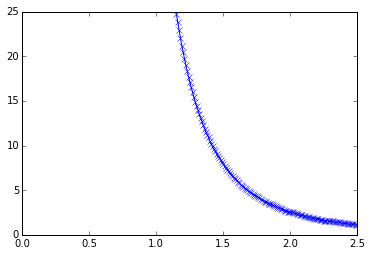

In [44]:
fieldGauss = field_bruker*10e3
plt.plot(z_bruker, fieldGauss, "-x")
plt.ylim([0,25])

index25Gauss = np.argmin(np.abs(fieldGauss - 25))
z25Gauss = z_bruker[index25Gauss]

print "Index: ", index25Gauss
print "z25GaussGauss: ", z25Gauss

grad = (fieldGauss[index25Gauss + 1] - fieldGauss[index25Gauss])/(z_bruker[index25Gauss+1] - z_bruker[index25Gauss])

print "Gradient (Gauss per m): ", grad
print "50 ppm of 25 Gauss is : ", 50e-6*25
print "Max length of sample is {} um".format( 0.00125/90*1e6 )